# Home Assignment No. 1: Practice

To solve this task efficiently, here are some practical suggestions:

* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that tutorials, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).


* Instead of rewriting existing code, if not explicitly asked to do so, use **BUILT-IN METHODS** available in the libraries. There exists a class/method for almost everything you can imagine (related to this homework).


* To complete this part of the homework, you have to write some **CODE** directly inside the specified places in the notebook **CELLS**.


* In some problems you are asked to provide a short discussion of the results. In these cases you have to create a **MARKDOWN** cell with your comments right after the corresponding code cell.


* For every separate problem, you can get **INTERMEDIATE scores**.


* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if a reviewer executes your code, the output will be the same (with all the corresponding plots) as in your uploaded files. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudo randomness.


* Your code must be readable to any competent reviewer. For this purpose, try to include **necessary** (and not more) comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY**.


* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameter and set it to `-1` to use all the cores.


* **IMPORTANT:** In the end you need to hand in a **single zip file** containing **two notebooks** (theory and practice) as well as the **html exported versions** of these notebooks. That is **4** files in total.


To begin let's import the essential (for this assignment) libraries.

In [39]:
import numpy as np

# for reproducibility
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Least Mean Squares

In the **regression** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have real-valued labels $y_{1}, \dots, y_{m} \in \mathbb{R}$.

In Least Mean Squares the hypothesis function is given by a linear combination of the features $h_{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x}$.

The maximum likelihood estimator for the Least Mean Squares problem is the solution of the following optimization problem.

$$
\theta^{*} = \arg \min_{\theta} \|\mathbf{X}\theta - \mathbf{y}\|^2,
$$

where $\mathbf{X}$ is a $m\times d$ matrix that has the feature vectors as rows and $\mathbf{y} \in \mathbb{R}^m$ is a vector consisting of all the labels.

This problem is known to have a unique closed-form solution in the case of a full-rank $\mathbf{X}$. 

$$
\theta^{*} = (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In the first part of this assignment you are asked to implement this solution.

## Task 1: Regressor Class [10 points]

In this task you are asked to implement a regressor class that fits the Least Squares parameters to the data and performs predictions at new data points. You need to implement 3 methods: fit, predict and score. `fit` estimates and stores the coefficients of the linear regression in *self.coef_*. `predict` performs prediction using the estimated coefficients. `score` calculates the mean squared error. 

In [40]:
class LeastSquares(object):
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        ### BEGIN Solution
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y
        ### END Solution
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        assert self.coef_ is not None, "Fit the model first!"
        
        ### BEGIN Solution
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        predictions = X @ self.coef_
        ### END Solution
        
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        return predictions
    
    def score(self, X: np.ndarray, y: np.ndarray) -> np.float64:
        """
        Calculates mean squared error.
        
        :param x: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution
        return np.mean((self.predict(X) - y)**2)
        ### END Solution

## Task 2. Regression Line [10 points]

In this task, your goal is to visualize the **regression line** of **Least Mean Squares** applied to a synthetic dataset. In the cell below we generate the dataset.

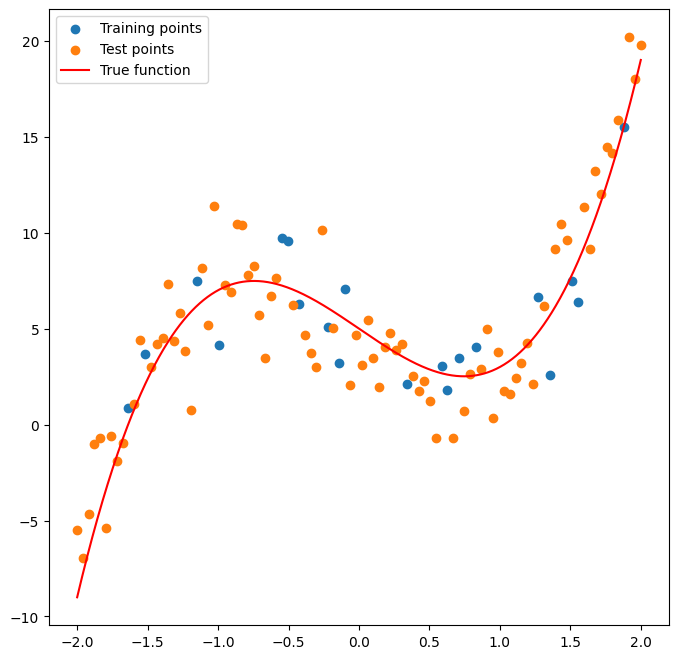

In [41]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

def f(X, noise_rate: float = 0):
    return 3 * X**3 - 5 * X + 5 + noise_rate * np.random.randn(X.shape[0])

n_samples = 100
X = np.linspace(-2, 2, n_samples)
y = f(X, noise_rate=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=True, random_state=0)

fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")

xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
plt.plot()

plt.legend()
plt.show()

In [42]:
print(X.shape)
print(y.shape)

(100,)
(100,)


Fit your model to the training data and visualize the predictions on the same plot with the data points. Report the mean squared error on the training and test data.

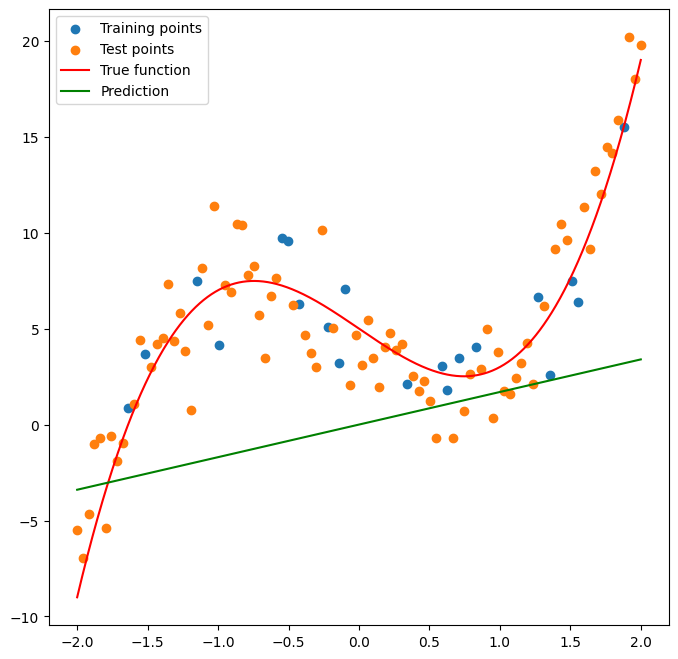

Train Score
38.40402189955796
Test Score
46.308954419947966


In [43]:
### BEGIN Solution
model = LeastSquares()
model.fit(X_train, y_train)
fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train, y_train, label="Training points")
plt.scatter(X_test, y_test, label="Test points")

xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")
p=model.predict(xrange)
plt.plot(xrange, p, c="g", label="Prediction")
plt.plot()

plt.legend()
plt.show()

print("Train Score")
print(model.score(X_train, y_train))

print("Test Score")
print(model.score(X_test, y_test))
### END Solution

You may notice that the prediction is far from being accurate. In this example the features are 1-dimensional. So the hypothesis function has the form $\theta x$, where both $\theta$ and $x$ are real numbers. Hence, the regression line has to go through the point (0, 0), which leads to inaccuracies, when $y$ is biased, as in the example above. To overcome this, a common practice is to add an additional column of 1s to the data matrix $\mathbf{X}$. This will model the intercept of the regression line.

Implement this and visualize/report the results.

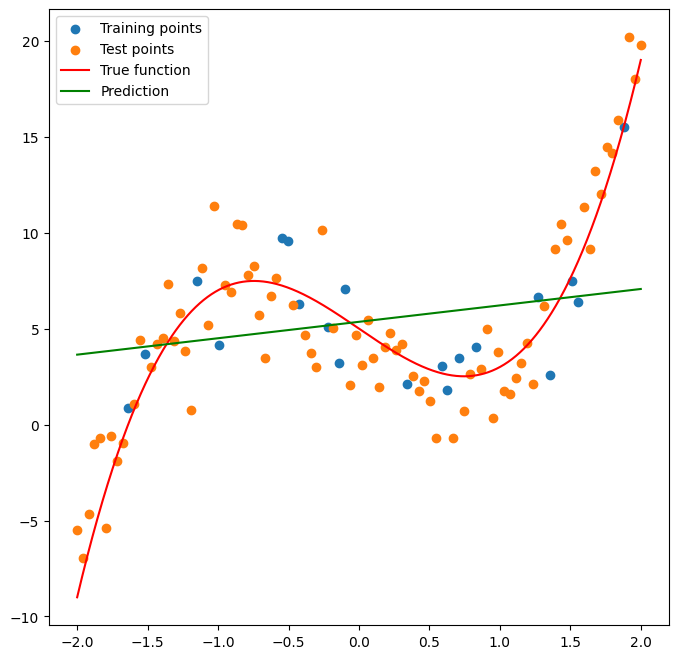

Train Score
10.505999757669576
Test Score
23.222364478406426


In [44]:
### BEGIN Solution
np.random.seed(0)


X = np.linspace(-2, 2, n_samples).reshape(-1, 1)
bias_column = np.ones((X.shape[0], 1))  # Creates a column of ones
X_with_bias = np.hstack((X, bias_column))
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.8, shuffle=True, random_state=0)

model = LeastSquares()
model.fit(X_train, y_train)
fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train[:,0], y_train, label="Training points")
plt.scatter(X_test[:,0], y_test, label="Test points")

xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")

xrange = xrange.reshape(-1, 1)
xrange_bias_column = np.ones((xrange.shape[0], 1))
xrange_with_bias = np.hstack((xrange, xrange_bias_column))
p=model.predict(xrange_with_bias)
plt.plot(xrange, p, c="g", label="Prediction")
plt.plot()

plt.legend()
plt.show()

print("Train Score")
print(model.score(X_train, y_train))

print("Test Score")
print(model.score(X_test, y_test))
### END Solution

# Locally Weighted Linear Regression

As you may observe in the previous task, linear models have difficulties with fitting non-linear functions. One way to overcome this could be to consider non-linear modifications of the original features in the model. We will leave this for later. Another way is to do Locally Weighted Regression (LWR). 

In LWR a separate regression is fitted and used to predict the outcome at each query poins. The training examples are weighted according to their similarity to the query point (in the simplest form, the distance to the query point is used). That is, for a data point $\mathbf{x}_0 \in \mathbb{R}^d$ the prediction is given by:

$$
\hat y_0 = \theta^*(\mathbf{x}_0)^\top \mathbf{x}_0
$$

where

$$
\theta^*(\mathbf{x}_0) = \arg \min_{\theta(\mathbf{x}_0)} \sum_{i = 1}^m w^{(i)}(\mathbf{x}_0) \left(y_i - \theta(\mathbf{x}_0)^\top \mathbf{x}_i\right)^2
$$

Let $W(\mathbf{x}_0)$ be a $m\times m$ diagonal matrix with $w^{(i)}(\mathbf{x}_0)$ on the $i$-th diagonal element. Then under the same assumptions as for LMS a closed form solution can be derived for $\hat y_0$.

$$
\hat y_0 = \mathbf{x}_0^\top (\mathbf{X}^\top W(\mathbf{x}_0) \mathbf{X})^{-1} X^\top W(\mathbf{x}_0) \mathbf{y}
$$

## Task 3. Implement LWR [15 points]

In this task you need to implement a class that preforms Locally Weighted Linear Regression. As the model is fitted again for every new query point, the `fit` method only needs to memorise the dataset. You are asked to implement 3 methods: kernel, predict_ and score. `kernel` constructs the $W(\mathbf{x}_0)$ matrix. Let's consider a specific kernel here, that is given by:

$$
w^{(i)}(\mathbf{x}_0) = \exp\left(- \frac{\|\mathbf{x}_0 - \mathbf{x}_i\|^2}{2 \tau^2}\right)
$$

`predict_` performs prediction for a single data sample. `score`, as before, calculates the mean squared error.

In [45]:
class LocalLeastSquares(object):
    def __init__(self, tau: float):
        self.tau_ = tau
        
        self.X_ = None
        self.y_ = None
        
        self.coef_ = None
        
    def kernel(self, x: np.ndarray) -> np.ndarray:
        """
        :param x: array of shape (d,)
        :return: array of shape (m, m)
        """
        ### BEGIN Solution
        w = np.diag(np.exp(-np.sum((x - self.X_)**2,axis=1) / (2 * self.tau_**2)))
        return w
        ### END Solution
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        """
        
        self.X_ = X
        self.y_ = y
                
    def predict_(self, x: np.ndarray) -> np.float64:
        """
        :param x: array of shape (d,)
        :return: single number, prediction at x
        """
        ### BEGIN Solution

        W = self.kernel(x)
        y = x.reshape(-1,1).T @ np.linalg.inv(self.X_.T @ W @ self.X_) @ (self.X_.T @ W @ self.y_.reshape(-1,1))
        return y[0][0]
        ### END Solution
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        :param X: array of shape (m, d)
        :return: array of shape (m,)
        """
        
        return np.array([self.predict_(x) for x in X])
        
    def score(self, X, y):
        """
        Calculates mean squared error.
        
        :param X: array of shape (m, d)
        :param y: array of shape (m,)
        :return: single number
        """
        ### BEGIN Solution
        return np.mean((self.predict(X) - y)**2)
        ### END Solution

Visualize the resulting regression line along with the data points and train/test MSE, as done in the previous examples.

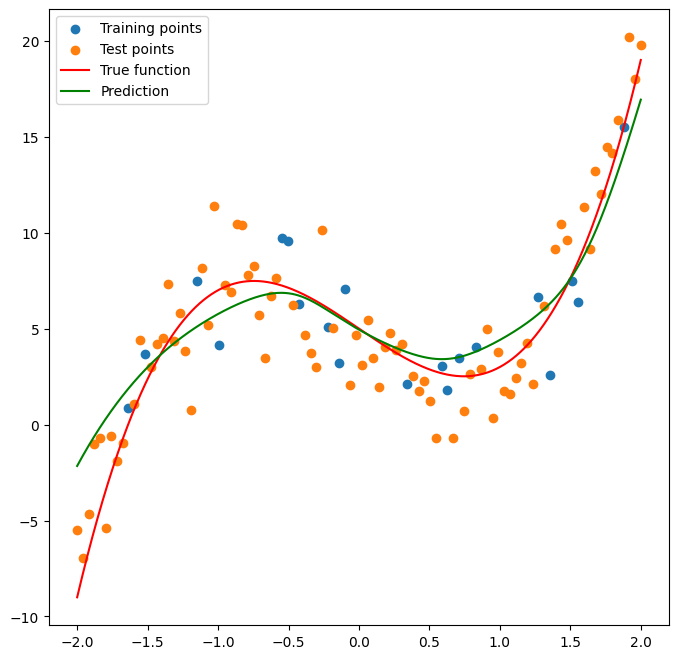

Train Score
3.0225178338880117
Test Score
6.321047184926247


In [46]:
### BEGIN Solution
np.random.seed(0)

X = np.linspace(-2, 2, n_samples).reshape(-1, 1)
bias_column = np.ones((X.shape[0], 1)) 
X_with_bias = np.hstack((X, bias_column))
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.8, shuffle=True, random_state=0)

model = LocalLeastSquares(0.4)
model.fit(X_train, y_train)
fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train[:,0], y_train, label="Training points")
plt.scatter(X_test[:,0], y_test, label="Test points")

xrange = np.linspace(-2, 2, 1000)
plt.plot(xrange, f(xrange, noise_rate=0), c="r", label="True function")

xrange = xrange.reshape(-1, 1)
xrange_bias_column = np.ones((xrange.shape[0], 1))
xrange_with_bias = np.hstack((xrange, xrange_bias_column))
p=model.predict(xrange_with_bias)
plt.plot(xrange, p, c="g", label="Prediction")
plt.plot()

plt.legend()
plt.show()

print("Train Score")
print(model.score(X_train, y_train))

print("Test Score")
print(model.score(X_test, y_test))
### END Solution

## Task 4. Tune the hyperparameters [7 points]

$\tau$ is an important hyperparameter that can regulate overfitting of the method. Choose an optimal value of $\tau$ in order to minimize the residual sum of squares on the left out data.

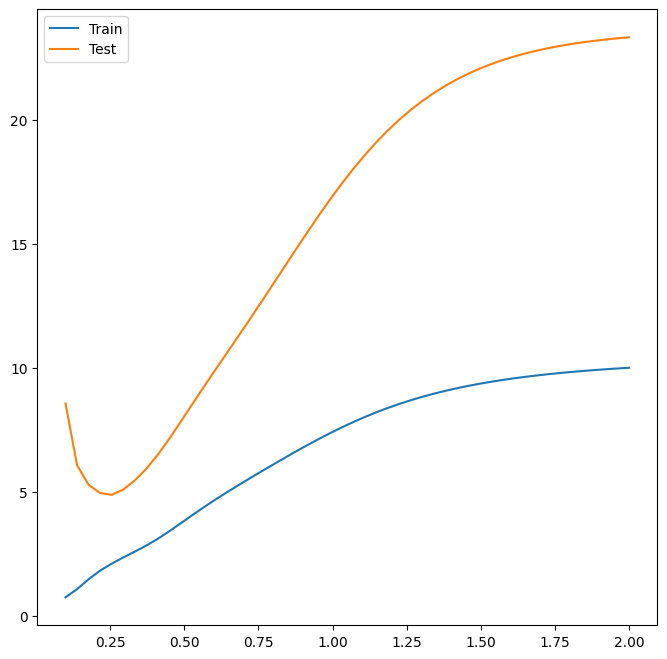

Best tau
0.25510204081632654


In [47]:
### BEGIN Solution
np.random.seed(0)

X = np.linspace(-2, 2, n_samples).reshape(-1, 1)
bias_column = np.ones((X.shape[0], 1))  # Creates a column of ones
X_with_bias = np.hstack((X, bias_column))
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.8, shuffle=True, random_state=0)
tau = np.linspace(0.1, 2, 50)
train_scores = []
test_scores = []

for t in tau:
    model = LocalLeastSquares(t)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

fig = plt.figure(figsize=(8, 8))
plt.plot(tau, train_scores, label="Train")
plt.plot(tau, test_scores, label="Test")
plt.legend()
plt.show()

print("Best tau")
print(tau[np.argmin(test_scores)])
### END Solution

What is the effect of different values for $\tau$?


If the value of $\tau$ is too small, the model will overfit the data, and the prediction will be very sensitive to the noise in the data. On the other hand, if the value of $\tau$ is too large, the model will underfit the data, and the prediction will be very smooth and not accurate.
A large value of $\tau$ weights the point farther away from the query point more and a small value of $\tau$ weights the point closer to the query point more.


What are advantages/disadvantages of the LWR method?

Advantages:
1. LWR is a non-parametric method. It does not make any assumption about the underlying data distribution. Therefore it can be used for any type of data distribution.

Disadvantages:
1. LWR is computationally expensive. As the model is fitted again for every new query point, the computational cost is high.
2. LWR is sensitive to the choice of the kernel function and the bandwidth parameter.
3. All the data points are used for prediction. Therefore, they have to be stored in memory.


# Logistic Regression

Now let's consider **classification** task. In the **binary classification** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have binary labels $y_{1}, \dots, y_{m} \in \{0, 1\}$.

Using a **linear combination** of the features $\mathbf{\theta}^\top \mathbf{x}$, like in Least Mean Squares, will result in an unbounded estimator. However, we would like to have a mapping $f_{\mathbf{\theta}}: \mathbb{R}^d \to \{0, 1\}$, the output of which can be naturally interpreted as the probability of belonging to class 1.

In **Logistic Regression** the resulting dot-product $\mathbf{\theta}^\top \mathbf{x}$ is converted to the unit interval with the **sigmoid** function:

$$g(z) = \frac{1}{1 + e^{-z}}$$

This gives us the hypothesis function:

$$f_{\mathbf{\theta}}(\mathbf{x}) = g(\mathbf{\theta}^{\top}\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^{\top}\mathbf{x}}}$$

Now, we only need to set a **threshold** (for example, 0.5) for classifying an object to the 1st class.

## Task 5. Sigmoid [4 points]

Implement and plot the sigmoid function. 

**Important!** Your function should work for inputs of arbitrary shape. The sigmoid should be applied elementwise. The returned array should have the same shape as the input. 

**Important!!** For large negative input, computing the exponent in the sigmoid may result in overflow. Use an alternative form of the sigmoid for the negative entries of the input to deal with this issue.

**Hint:** An alternative form can be obtained by multiplying the nominator and the denominator of the sigmoid by $e^z$.

In [48]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    :param z: array of arbitrary shape
    """
    ### BEGIN Solution
    #e_z = np.exp(z)
    #return e_z / np.sum(e_z)
    z = np.clip(z, -500, 500)
    return 1/(1+np.exp(-z))
    #For me this version is more stable
    ### END Solution
    (n,)
    (n,1)
    vector = vector[:, None]

In [49]:
# This should not raise a warning
sigmoid(np.array([-1000]))

array([7.12457641e-218])

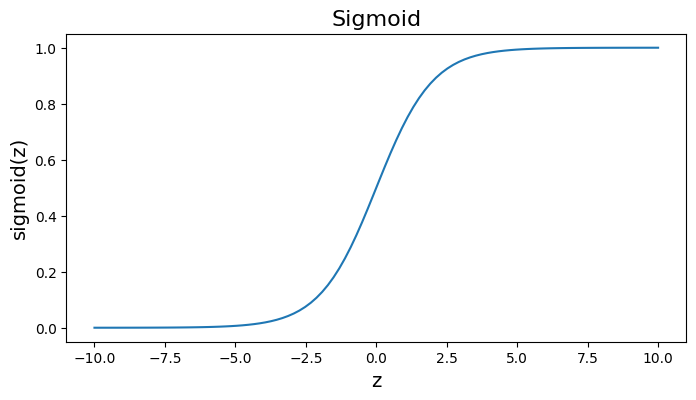

In [50]:
z = np.linspace(-10, 10, 100)

plt.figure(figsize=(8, 4))

### BEGIN Solution
y = sigmoid(z)
plt.plot(z, y)
### END Solution

plt.title('Sigmoid', size=16)

plt.xlabel('z', size=14)
plt.ylabel('sigmoid(z)', size=14)

plt.show()

Thus, the conditional probabilities of belonging to class 1 or 0 are as follows:

$$\begin{align}
    p(y = 1| \mathbf{x}; \mathbf{\theta}) &= f_{\mathbf{\theta}}(\mathbf{x}) \\
    p(y = 0| \mathbf{x}; \mathbf{\theta}) &= 1 - f_{\mathbf{\theta}}(\mathbf{x})
\end{align}$$

Or one could rewrite it as:

$$p(y| \mathbf{x}; \mathbf{\theta}) = f_{\mathbf{\theta}}(\mathbf{x})^{y}\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x})\bigr]^{1 - y}$$

&nbsp;

Now, to **estimate** the weights $\mathbf{\theta}$, we will **maximize** the **likelihood** function (more precisely, its logarithm for simpler calculations). Therefore, this method is called the **maximum likelihood estimation** (MLE).

$$\ln{\mathcal{L}(\mathbf{\theta})} = \mathcal{l}(\mathbf{\theta}) = \sum\limits_{i = 1}^m p(y_i| \mathbf{x}_i; \mathbf{\theta}) = \sum\limits_{i = 1}^m y_i \ln{\bigl[f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} + (1 - y_i)\ln{\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} \to \max\limits_{\mathbf{\theta}}$$

## Task 6. Log-Likelihood [3 points]

Let $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1^{\top} \\ \vdots \\ \mathbf{x}_m^{\top} \end{bmatrix} \in \mathbb{R}^{m \times d}$ be the data matrix, $\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} \in \mathbb{R}^{m}$ be the labels vector corresponding to $\mathbf{X}$ and $\mathbf{\theta} = \begin{bmatrix} \theta_1 \\ \vdots \\ \theta_d \end{bmatrix} \in \mathbb{R}^{d}$ be the parameters vector.

Implement the log-likelihood for Logistic Regression.

**Note:** You have already implemented the sigmoid function. Now it is time to use it.

In [51]:
def log_likelihood_log_reg(theta, X, y):
    ### BEGIN Solution
    z= X @ theta
    p=sigmoid(z)
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    ### END Solution

In [52]:
m = 100
d = 2

X = np.random.randint(low=-10, high=10, size=(m, d))
y = np.random.randint(low=0, high=1, size=(m, 1))
theta = np.zeros((d, 1))
assert np.allclose(log_likelihood_log_reg(theta, X, y),
                   -m * np.log(2),
                   atol=1e-8), "Houston, we have a problem!"
print("Well done!")

Well done!


## Task 7. Gradient Descent [8 points]

Now, to find the weights $\mathbf{\theta}$, we need to solve the optimization problem described above. Let's use [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Since the gradient descent solves the **minimization** problem, we will change the maximization problem described above to the minimization problem by changing the sign of the log-likelihood function to negative:

$$\mathcal{l}(\mathbf{\theta}) \to \max\limits_{\mathbf{\theta}} \Longleftrightarrow -\mathcal{l}(\mathbf{\theta}) \to \min\limits_{\mathbf{\theta}}$$

So, let's first implement a function to compute the gradient of the **negative** log-likelihood function.

The gradient is a column vector that has **the same shape as** $\mathbf{\theta}$.

In [53]:
def negative_gradient_log_reg(theta, X, y):
    ### BEGIN Solution
    return -(y-sigmoid(X @ theta)).T@X
    ### END Solution

Now implement the general gradient descent algorithm.

In [54]:
def gradient_descent(X, y, gradient, theta_0, alpha=0.01, tolerance=1e-8, max_iters_number=100):
    """
    X: data matrix of shape [m, d]
    y: labels of shape [m]
    gradient: a function to compute the gradient of the neg. log-likelihood
    theta_0: initialization of theta of shape [d]
    alpha: learning rate
    tolerance: a value to detect convergence (if the norm of the update is smaller that tolerance, terminate)
    max_iters_number: maximum number of iterations of the algorithm
    
    return: the final estimation for theta
    """
    if y.ndim == 1:
        y = y[:, np.newaxis]
    
    if theta_0.ndim == 1:
        theta_0 = theta_0[:, np.newaxis]
    
    ### BEGIN Solution
    theta = theta_0
    for i in range(max_iters_number):
        theta_old = theta
        theta = theta - alpha * gradient(theta, X, y).T
        if np.linalg.norm(theta - theta_old) < tolerance:
            break

    return theta
    ### END Solution

## Task 8. Classifier [10 points]

Let's create our own classifier class and then compare it with the [existing method in the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We need to implement three principal methods:

* `fit` to find the coefficients (weights) $\mathbf{\theta}$


* `predict` to predict the labels $\mathbf{\hat{y}}$ for the data matrix $\mathbf{X}$


* `score` to evaluate predictions (for example, with **mean accuracy** score)

In [55]:
def accuracy_score(predictions, labels):
    """
    Returns the accuracy of predictions when compared to the true labels
    """
    assert predictions.shape == labels.shape, "Check shapes!"
    ### BEGIN Solution
    return np.sum(predictions == labels) / len(labels)
    ### END Solution

In [56]:
class LogReg(object):
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X, y):
        ### BEGIN Solution
        self.coef_ = gradient_descent(X, y, negative_gradient_log_reg, np.zeros((X.shape[1], 1)), alpha=0.01, tolerance=1e-8, max_iters_number=1000) 
        ### END Solution
        
    def predict(self, X, threshold=0.5):
        ### BEGIN Solution
        predictions = sigmoid(X @ self.coef_).ravel() > threshold
        ### END Solution
        
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        return predictions
    
    def score(self, X, y):
        ### BEGIN Solution
        return accuracy_score(self.predict(X), y)
        ### END Solution

## Task 9. Decision Rule [6 points]

In this task, your goal is to visualize the **decision rule** of **Logistic Regression** applied to a synthetic $2$-dimensional dataset generated by a built-in `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [57]:
from sklearn.datasets import make_moons

In [58]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
print(X.shape, y.shape)

(300, 2) (300,)


The goal is to fit our LogReg and sklearn's Logistic Regreesion classifiers to this data:

You have to plot the decision regions. The plots must have **titles**, which contain the names of the classifiers and the corresponding accuracy (rounded to only **two** decimal places).

You can write the plotting code on your own, but we highly recommend just to use [mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) library (`pip install mlxtend`), which has a awesome one-line decision boundary plotting function.

In [59]:
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

In [60]:
my_logistic_regression = LogReg()
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1)

classifiers = [my_logistic_regression, logistic_regression]

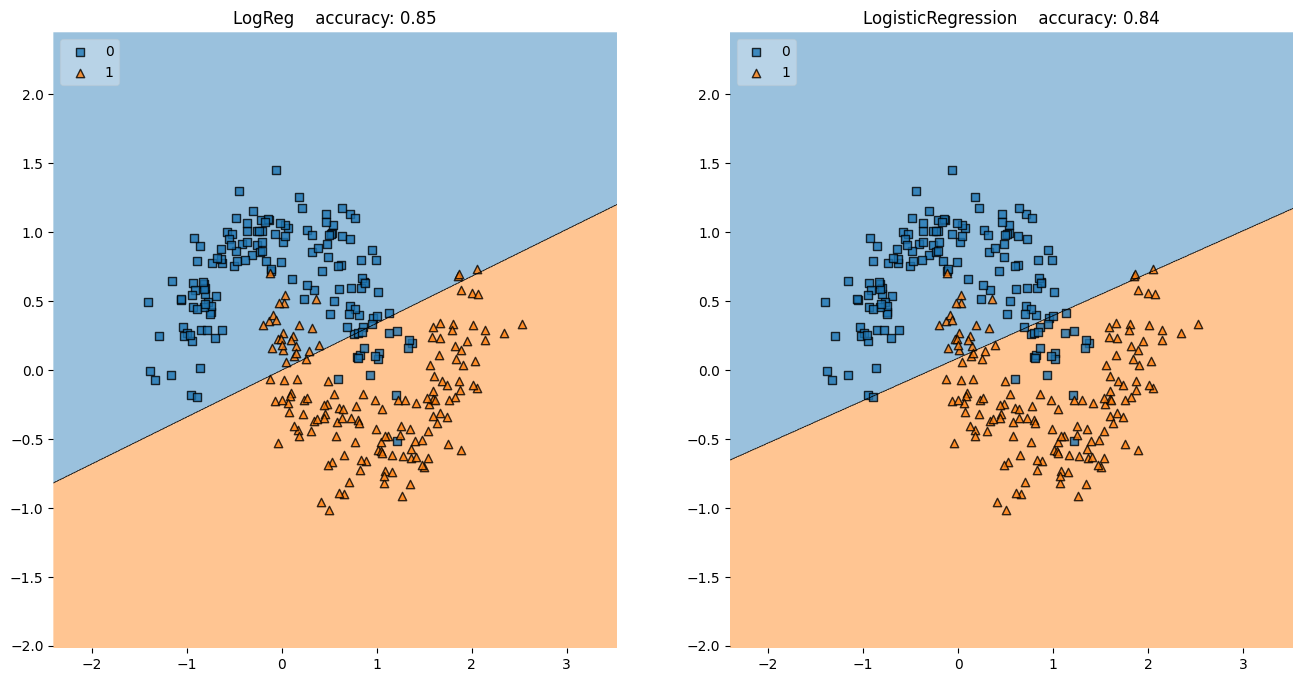

In [61]:
# plotting

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    acc = accuracy_score(y, y_pred)

    fig = plot_decision_regions(X=X, y=y, clf=classifier, legend=2, ax = axis)
    axis.set_title(classifier.__class__.__name__+"   "+f" accuracy: {acc:.2f}")

plt.show()
    ### END Solution

## Task 10. Feature Engineering [7 points]

In the previous task, classifiers obviously failed fitting to data. This happened because the decision boundary of the classifier has a restricted linear form, while the data is much more complicated.

One may try to change the parameters of the classifier in order to improve accuracy, but linear models do not have parameters that can change the form of the decision rule.

In this case, the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing ones and fit the classifier for the new features. This may help low-complexity classifiers to fit complex data dependencies.

Your task is

* to achieve accuracy $> 0.95$, by generating additional features (e.g. polynomial),


* to plot decision rules in the original feature space,


* to write 2-3 sentences about why you chose these features.

It is your choice how to generate features. You may create hand-crafted features and add them manually.

Nevertheless, we **highly recommend** getting used to and applying the following built-in `sklearn` methods, for example:

* `PolynomialFeatures` for [feature generation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* `StandardScaler`for [feature scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

* `Pipeline` - for [combining several operations](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) in a row (e.g. feature creation & prediction)

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [63]:
logistic_regression_simple = Pipeline([('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))])

### BEGIN Solution
logistic_regression_advanced = Pipeline([('poly2', PolynomialFeatures(3)), 
                                         ('scaler', StandardScaler()),
                                         ('advanced_LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))
                                         ])

### END Solution

classifiers = [logistic_regression_simple, logistic_regression_advanced]

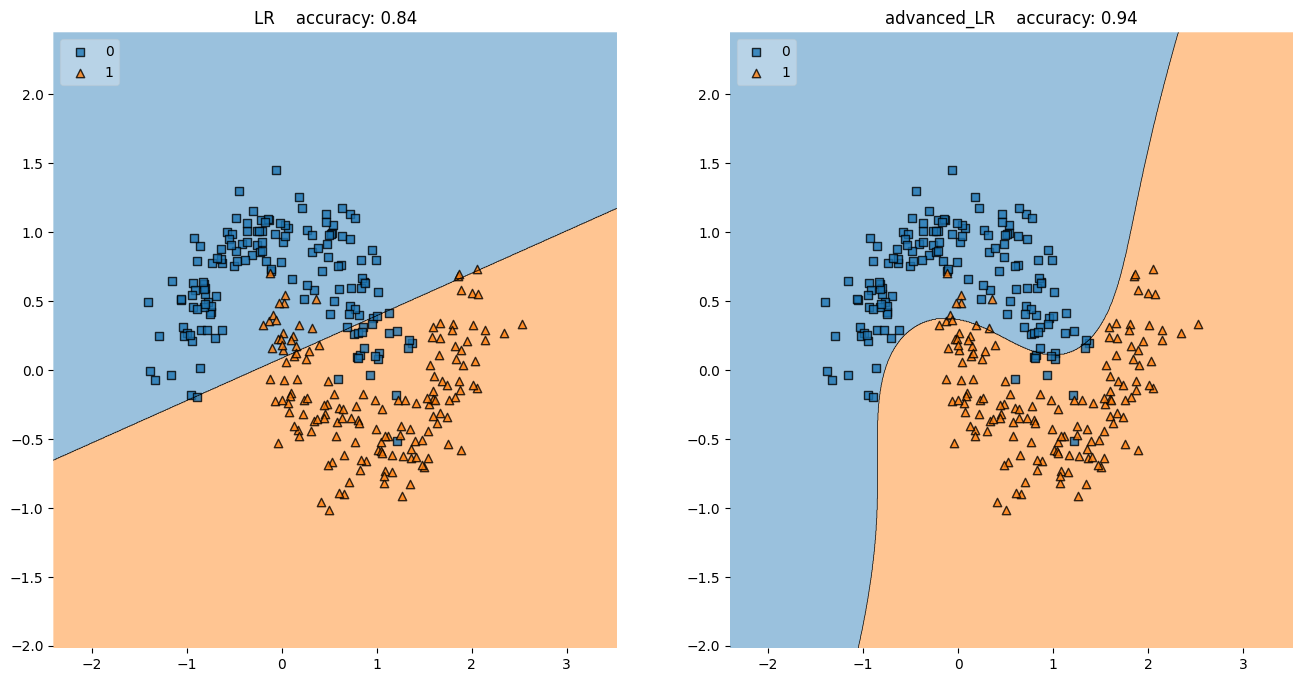

In [64]:
# plotting

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    acc = accuracy_score(y, y_pred)
    fig = plot_decision_regions(X=X, y=y, clf=classifier, legend=2, ax = axis)
    axis.set_title(classifier.steps[-1][0]+"   "+f" accuracy: {acc:.2f}")

plt.show()
    ### END Solution

Why did you choose these features?

I chose a polynomial feature of degree 3 because the data is not linearly separable. By looking at the plotted data, 3 seemed to be a reasonable choise. I did not choose a higher degree because it would lead to overfitting.
I also used the StandardScaler. This didn't have a significant effect on the accuracy. This is because the data is already quite well normalized.
I added it, because I think it is a good practice to normalize the data before applying a model.


# Face classification



In this task you will face a real-life problem of face detection. You have to train a model to classify 24$\times$24 grayscale images to *face*/*non-face* classes.
First, let us import some libraries and load the data.

In [65]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [66]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
labels[labels == -1] = 0  # Want labels in {0, 1}
data = data['Data']
data.shape

(19832, 576)

Each datapoint is a 576-dimentional vector that stores pixel intensities of a flattened grayscale image.
If carefully reshaped, one can visualize the datapoints as 24 $\times$ 24 images.

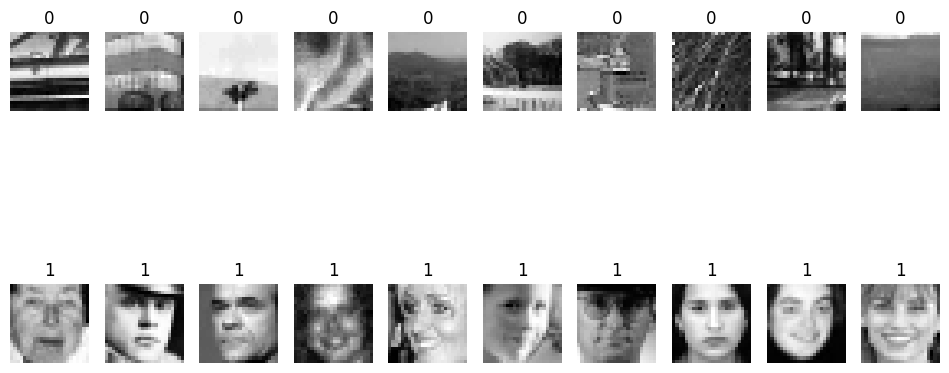

In [67]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [0, 1]
imgs = np.reshape(data, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(labels, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Now let us split the dataset into train and test. This will allow to assess the ability of our models to generalize to unseen data.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (13882, 576)
Training labels shape:  (13882,)
Test data shape:  (5950, 576)
Test labels shape:  (5950,)


## Task 11. Logistic Regression for Face Classification [5 points]

Now fit your *LogReg* class on *(X_train, y_train)* and report the accuracy on both the **train** and **test** sets.

**Warning:** It may take time to fit your model to this amount of data.

In [69]:
### BEGIN Solution

my_logistic_regression = LogReg()
my_logistic_regression.fit(X_train, y_train)  

### END Solution

Visualize the learned coefficients as a grayscale image. Reshape the coefficients and use *plt.imshow()*.

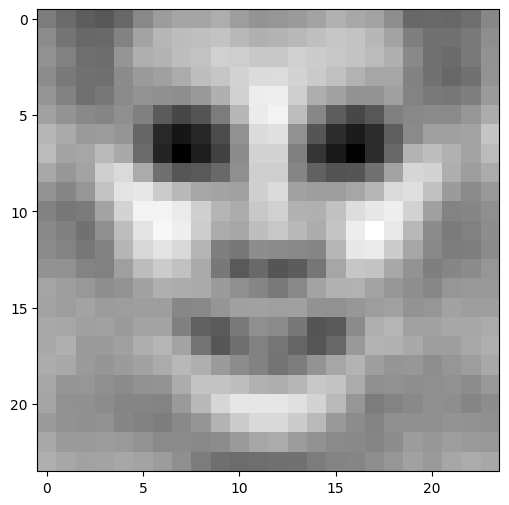

In [70]:
### BEGIN Solution
img = np.reshape(my_logistic_regression.coef_, [ 24, 24], order='F')
plt.imshow(img)
### END Solution

## Task 12. Tuning the model [5 points]

The final task is to build a model that reaches as high accuracy on the test set as possible.
Feel free to use anything that you already know from the lectures/tutorials/this assignment by the time this assignment was given (i.e. the 4th week).

Justify your final choice of the model.

In [71]:
### BEGIN Solution
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

print("Train Score")
print(clf.score(X_train, y_train))

print("Test Score")
print(clf.score(X_test, y_test))



### END Solution

Train Score
0.982495317677568
Test Score
0.9692436974789916


My justification:
I basically just tried out the different models we learnt about in the lectures. The support vector machine perfomed best. I also tried different hyperparameter. I got the best results with the standard parameters.
The support vector machine is a reasonable choise for this task, because the data is not linearly separable. The SVM can handle this by using the kernel trick. 
The support vector machine tries to maximies the margin between the the points of the two classes that are closest to the decision boundary. Intuitively, this seens like a good choise for this task.